In [18]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import face_recognition

X = np.load('dataset_x.npy')
Y = np.load('dataset_y.npy')

persons_img = []
persons_names = []

rootdir = "./celebrities/"

files = []
X = []
Y = []

i=0

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        someone_image = face_recognition.load_image_file(os.path.join(subdir, file))
        someone_encoding = face_recognition.face_encodings(someone_image)[0]
        X.append(someone_encoding)
        i = i + 1
        index = subdir.rfind('/')
        Y.append(subdir[index + 1: ])
        print(i)
        
        if file[ : 2] == '1.':
            persons_img.append(someone_image)
            persons_names.append(subdir[index + 1: ])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [19]:
Y = np.array(Y)
print(len(Y))

1020


In [20]:
a, b = np.unique(Y, return_counts=True)
counts = dict(zip(a, b))

for item in counts:
    print(item, counts[item])

Al_Pacino 20
Angelina_Jolie 20
Anthony_Hopkins 20
Antonio_Banderas 20
Benedict_Cumberbatch 20
Bill_Gates 20
Billy_Zane 20
Brad_Pitt 20
Bruce_Willis 20
Charlize_Theron 20
Christian_Bale 20
Cillian_Murphy 20
Denzel_Washington 20
Edward_Norton 20
Emma_Watson 20
George_Clooney 20
Gerard_Butler 20
Halle_Berry 20
Jake_Gyllenhaal 20
Jason_Statham 20
Jessica_Alba 20
Jim_Carrey 20
Jodie_Foster 20
John_Travolta 20
Kate_Winslet 20
Keanu_Reeves 20
Kevin_Spacey 20
Leonardio_Di_Caprio 20
Liam_Neeson 20
Matt_Damon 20
Matthew_Mcconaughey 20
Michael_Jordan 20
Monica_Bellucci 20
Morgan_Freeman 20
Natalie_Portman 20
Nicolas_Cage 20
Nikola_Kojo 20
Robert_De_Niro 20
Russell_Crowe 20
Ryan_Gosling 20
Salma_Hayek 20
Scarlett_Johansson 20
Sharon_Stone 20
The_Rock 20
Tom_Cruise 20
Tom_Hanks 20
Tom_Hardy 20
Uma_Thurman 20
Vin_Diesel 20
Will_Ferrell 20
Will_Smith 20


[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


(array([ 0.,  0.,  0.,  0.,  0., 51.,  0.,  0.,  0.,  0.]),
 array([19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1, 20.2, 20.3, 20.4, 20.5]),
 <a list of 10 Patch objects>)

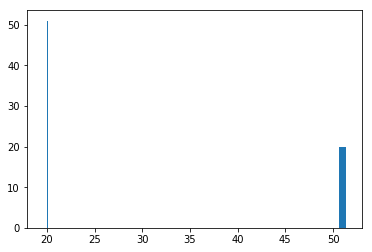

In [21]:
from matplotlib import pyplot as plt
keys = counts.keys()
values = []

for key in keys:
    values.append(counts[key])
    
print(values)
bars = plt.bar(len(keys), values)

plt.hist(values)

In [22]:
X = np.array(X)

In [23]:
np.save('dataset_x', X)
np.save('dataset_y', Y)

In [24]:
# persons_img = [ : 20]
# persons_names = [ : 20]

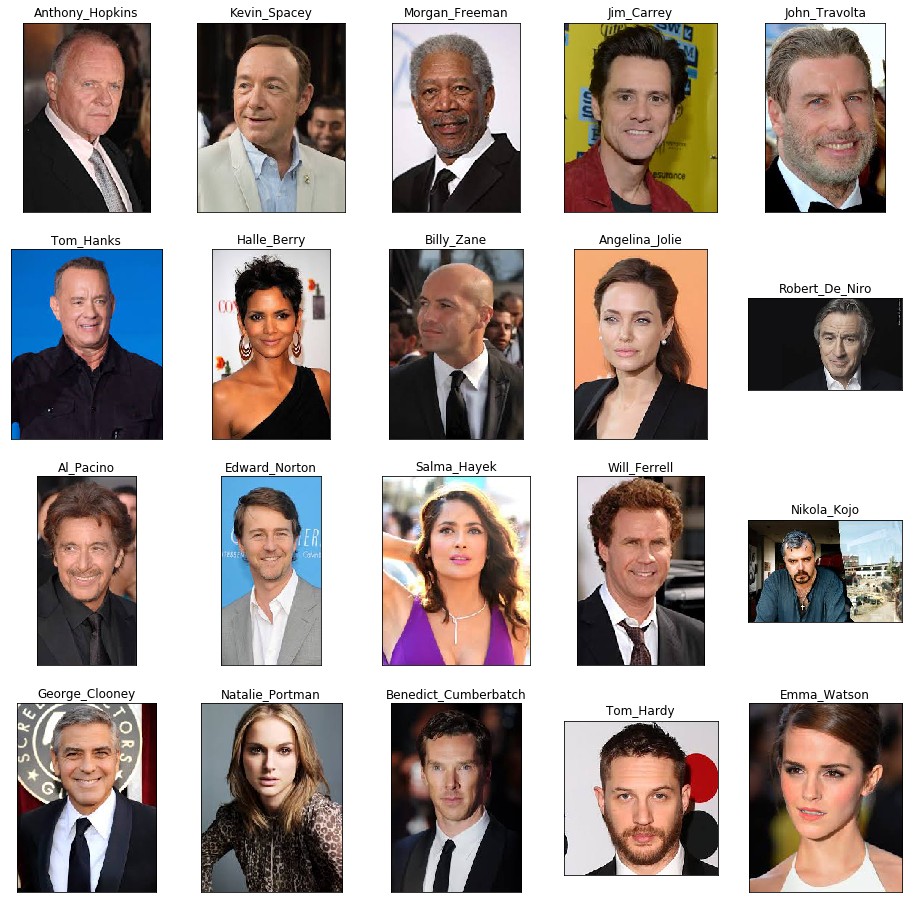

In [25]:
figure, axis = plt.subplots(4, 5, figsize=(16, 16), subplot_kw={'xticks':(), 'yticks':()})
ravel = axis.ravel()
for i in range(ravel.shape[0]):
    axis = ravel[i]
    image = persons_img[i]
    name = persons_names[i]
    axis.imshow(image)
    axis.set_title(name)